### Project 2: Scikitlearn Linear Regression
#### Montgomery College DATA201 Spring 2019  [Steve Dutky](sdutky@gmail.com)
The second project will be on Linear Regression:
You can work on the dataset from project 1 or choose another dataset. The outcome/target
variable must be continuous quantitative variable. The main goal of this project is to use the
Scikitlearn Linear Regression, split the data into training and testing data, check the score
(variance explained by the model) and plot the residual.



#### python/jupyter initialization:

In [1]:
## import packages:
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import seaborn as sns
from scipy import stats #  library of statistical functions
import sklearn #

#
# Set seed for generating psuedo random numbers
np.random.seed(12345678)
#
# Set up graphics
plt.style.use('classic')
%matplotlib inline

## Data source: Dataset:  [asphalt_binder](http://users.stat.ufl.edu/~winner/data/asphalt_binder.txt)

Source: J. Wei, F. Dong, Y. Li, and Y. Zhang (2014). "Relationship Analysis
Between Surface Free Energy and Chemical Composition of Ashalt Binder," 
Construction and Building Materials, Vol. 71, pp. 116-123.

Description: Experiment relating:
Asphalt suface free energy in mJ/m^2 (sfe)
to groups of Component and Elemental Factors:
- % [Saturates](https://en.wikipedia.org/wiki/Saturation_(chemistry)#Hydrocarbons) (sats) molecules with chains of carbon atoms without double or triple bonds or any rings.
- % [Aromatics](https://en.wikipedia.org/wiki/Aromatic_hydrocarbon)   (arms) molecules with flat rings of atoms with shared electrons
- % [Resins](https://www.eastman.com/Markets/Tackifier_Center/Tackifier_Families/Hydrocarbon_Resins/Pages/Hydrocarbon_Resins.aspx)    (rsns) low molecular weight aromatic polymers extracted during oil refining
- % [Asphaltenes](https://en.wikipedia.org/wiki/Asphaltene)  (asps) gunk left over from refining oil: sticky, carcinogenic, and foul.
- % [Wax](https://en.wikipedia.org/wiki/Wax#Petroleum_derived_waxes)     (wax) saturated carbon compounds with repeated branches and structures
- % Carbon    (c)
- % Hydrogen    (h)
- % Oxygen     (o)
- % Nitrogen   (n)
- % Sulfur    (s)
- Nickel in ppm   (ni)
- Vanadium in ppm   (v)

U.S. spends approximately \\$20 billion/year on asphalt pavements with disproportionately high maintenance costs of \\$9.3 billion/year. Better performance of asphalt pavements is crucial to reducing these maintenance costs (Wasiuddin, 2007).

<p>Surface free energy, which
is a thermodynamic material property, is directly related to the adhesive bond energy
between the asphalt binder and the aggregate as well as the cohesive bond energy of the
asphalt binder. (Howson, 2011) Asphalt binder which lacks cohesion tends to not stick together: it distorts and fractures under traffic load. Asphalt binder which poorly adheres to the stone aggregate in pavement allows water to seep in, freeze, melt, and leave behind pot holes.
<p><p> For each of the twenty three samples of asphalt binder, the authors measured its surface free energy, the percentage make up of its molecular components, the percentage make up of its elemental components, and the quantities of trace amounts of nickel and vanadium.
    
<p><p><p>For this project, I am going to scikitlearn to see how well the percentage of molecular components model the surface free energy of asphalt binder.




Wasiuddin, Nazimuddin Mohammad. 2007 <a href="[https://shareok.org/bitstream/handle/11244/1261/3283862.PDF?sequence=1&isAllowed=y">Effect of additives on surface free energy characteristics of aggregates and binders in hot mix asphalt.</a>

Howson, Jonathan Embrey, 2011 <a href="https://oaktrust.library.tamu.edu/bitstream/handle/1969.1/ETD-TAMU-2011-08-10179/HOWSON-DISSERTATION.pdf?sequence=2&isAllowed=y">Relationship Between Surface Free Energy and Total Work of Fracture of Asphalt
Binder and Asphalt Binder-Aggregate Interfaces.</a> 

[CSV Data File](http://users.stat.ufl.edu/~winner/data/asphalt_binder.csv)


In [2]:
# read data from source
df=pd.read_csv('http://users.stat.ufl.edu/~winner/data/asphalt_binder.csv')
# and see what it looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 14 columns):
asp.code      23 non-null object
srf.fr.eng    23 non-null float64
saturates     23 non-null float64
aromatics     23 non-null float64
resins        23 non-null float64
asptenes      23 non-null float64
wax           23 non-null float64
carbon        23 non-null float64
hydrogen      23 non-null float64
oxygen        23 non-null float64
nitrogen      23 non-null float64
sulfur        23 non-null float64
nickel        23 non-null int64
vanadium      23 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 2.6+ KB


In [3]:
# discard asp.code column, rename columns to be more convenient
df.drop('asp.code',axis=1,inplace=True)
df.columns=["sfe", "sats", "arms", "rsns", "asps", "wax", "c", "h", "o", "n", "s", "ni", "v"]

### Find a reasonable model:
#### import the combinations of all models from github and fit them all using statsmodel.ols

In [4]:
dfOls=pd.read_csv('https://github.com/sdutky/mcData201/raw/master/formulaCombinations.csv')
#dfOls['rSquared']=0*dfOls.index
import statsmodels.formula.api as sm
for i in dfOls.index:
    result = sm.ols(formula=dfOls.formula[i], data=df).fit()
    dfOls.loc[i,'rSquared']=float(result.rsquared)
    dfOls.loc[i,'condition']=float(result.condition_number)
    


In [5]:

dfOls.sort_values(by='rSquared',ascending=False)[['terms','formula','rSquared','condition']]

,terms,formula,rSquared,condition
30,5,sfe~sats+arms+rsns+asps+wax,0.884851,6950.535783
28,4,sfe~sats+rsns+asps+wax,0.884823,770.399640
27,4,sfe~sats+arms+asps+wax,0.884727,387.850647
29,4,sfe~arms+rsns+asps+wax,0.884065,2165.197404
20,3,sfe~sats+asps+wax,0.884007,77.376006
26,4,sfe~sats+arms+rsns+wax,0.875988,881.022204
24,3,sfe~rsns+asps+wax,0.873628,741.082583
23,3,sfe~arms+asps+wax,0.873544,271.626721
14,2,sfe~asps+wax,0.872557,52.902761
22,3,sfe~arms+rsns+wax,0.852420,648.895621


### coefficient of determination, denoted R2 or r2 and pronounced "R squared"
#### measures how well the regression "explains" the variance of the data: the closer R2 is to 1, the better the regression models the data:
 <p><p> $$R^2 \equiv 1 - {SS_{\rm res}\over SS_{\rm tot}}$$
<p>The total sum of squares (proportional to the variance of the data):
$$SS_\text{tot}=\sum_i (y_i-\bar{y})^2,$$
<p>The sum of squares of residuals, also called the residual sum of squares:
$$SS_\text{res}=\sum_i (y_i - \hat{y}_i)^2\,$$where
$\hat{y}_i$ is the predicted value of $\theta_0+\theta_1x_1i+\theta_2x_2i+...+\theta_nx_ni$
<p><a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">wikipedia</a>


In [6]:
#from IPython.display import Image
#from IPython.core.display import HTML 
#Image("https://raw.githubusercontent.com/sdutky/mcData201/master/collinearity.jpg", width=500, height=150)

### Example of multicollinearity
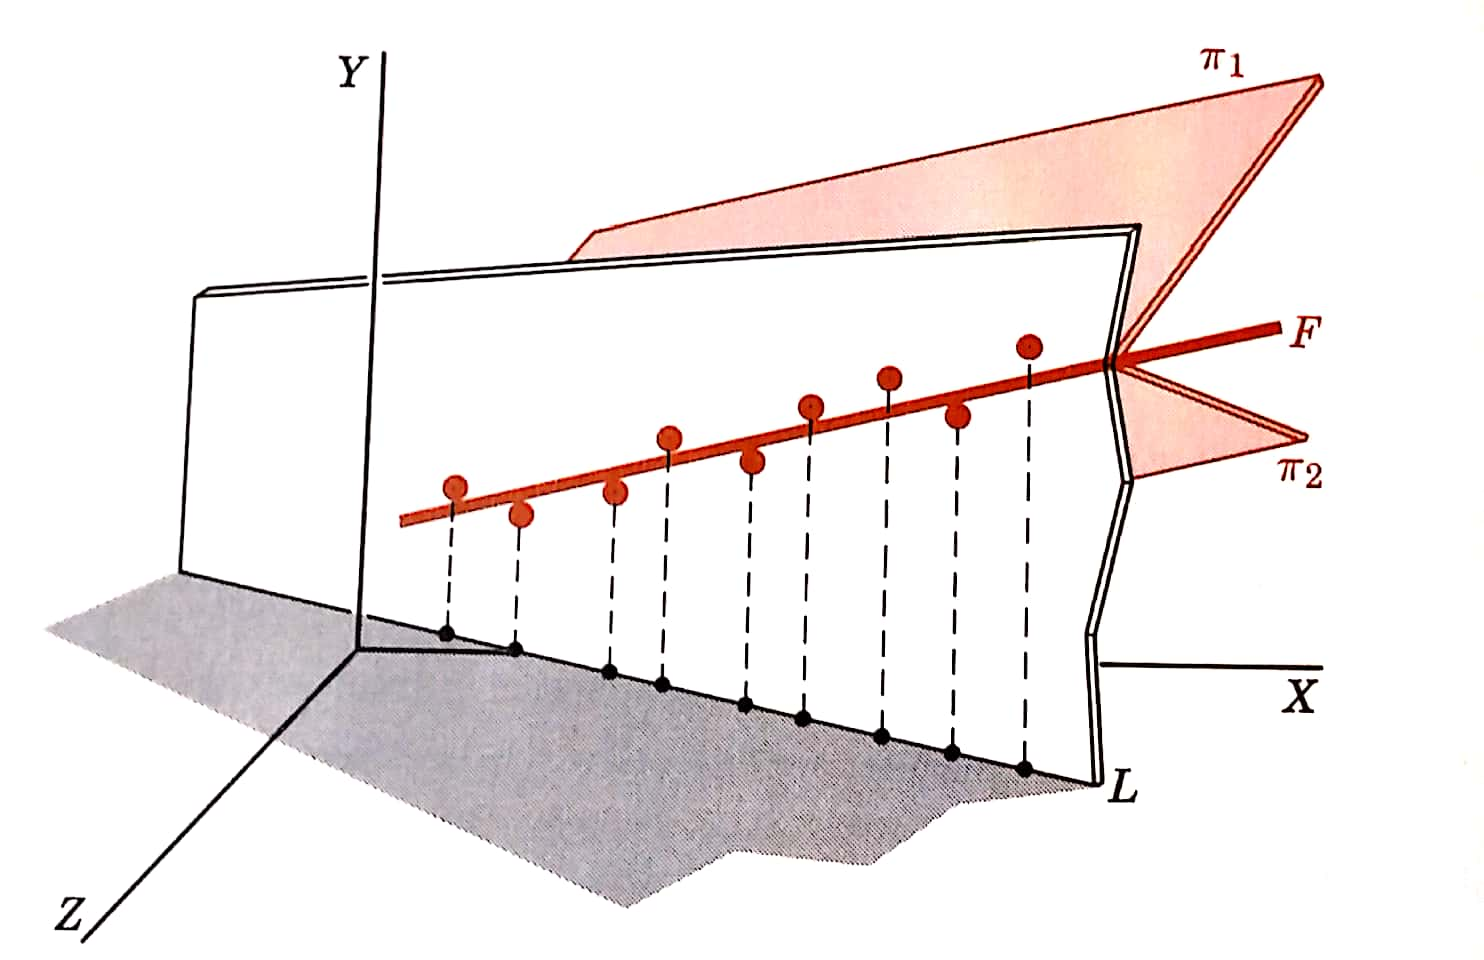
The values of <B>x,z</B> arise only from line <B>L</B> producing a regression line <B>F</B> through which pass an infinite number of planes <B>$\boldsymbol\pi_i$</B>.  There is low confidence that the model will accurately predict <B>y</B> from values off line <B>L</B> <p><p>A large <B>Condition Number</B> (derived from the eigenvalues of the design matrix formed from the data) indicates a greater likelihood of significant multicollinearity.
<p>image from Wonnacott, Thomas H. and Wonnacott, Ronald J. <U>Introductory Statistics for Business and Economics</U> 1977 p 368

We want to choose the model that balances the tradeoff between R squared and condition
<p>By inspection this is <B>sfe ~ asps + wax</B>

In [7]:
dfOls.loc[14,:]

terms                   2
formula      sfe~asps+wax
rSquared         0.872557
condition         52.9028
Name: 14, dtype: object

In [8]:
result = sm.ols(formula='sfe~asps+wax', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    sfe   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     68.47
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           1.13e-09
Time:                        14:39:31   Log-Likelihood:                -40.909
No. Observations:                  23   AIC:                             87.82
Df Residuals:                      20   BIC:                             91.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9368      1.050     28.500      0.0

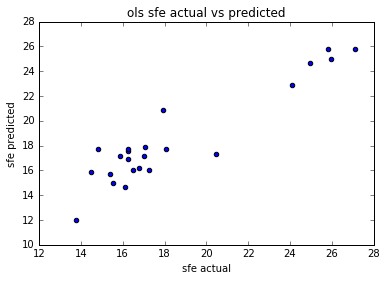

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.sfe,result.predict(df))
ax.set_ylabel('sfe predicted')
ax.set_xlabel('sfe actual')
ax.set_title('ols sfe actual vs predicted')
plt.show()

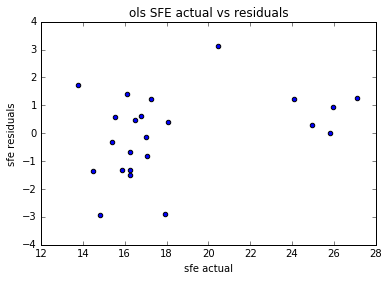

In [10]:
fig, ax = plt.subplots()
ax.scatter(df.sfe,result.resid)
ax.set_ylabel('sfe residuals')
ax.set_xlabel('sfe actual')
ax.set_title('ols SFE actual vs residuals')
plt.show()

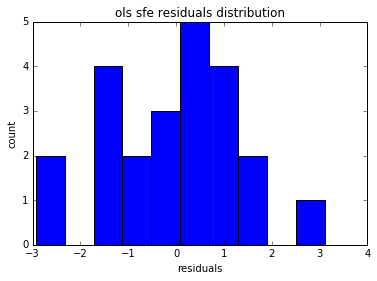

In [11]:
fig, ax = plt.subplots()
ax.hist(result.resid)
ax.set_ylabel('count')
ax.set_xlabel('residuals')
ax.set_title('ols sfe residuals distribution')
plt.show()

###  Scikitlearn Linear Regression
#### Split df into training and test datasets
use df.sfe as the target and the remaining columns as indepedent predictor variables

In [12]:
from sklearn.model_selection import train_test_split
#predictors=df[["sats", "arms", "rsns", "wax","asps"]]
predictors=df[["asps","wax"]]
target=df.sfe

Xtrain, Xtest, yTrain, yTest = train_test_split( predictors, target, test_size=0.25, random_state=9)

#### Describe the  training and test data for the predictor variables

In [13]:
desc=(pd.DataFrame(Xtrain.describe()))
pd.concat([desc,pd.DataFrame(Xtest.describe()) ], axis=1, join_axes=[desc.index]).T

,count,mean,std,min,25%,50%,75%,max
asps,17.0,15.005882,5.924047,4.00,12.600,17.10,17.900,25.60
wax,17.0,2.847647,1.430867,0.81,1.230,2.85,4.200,5.05
asps,6.0,13.733333,6.181478,5.00,10.525,13.15,18.400,21.30
wax,6.0,2.535000,1.484907,1.11,1.230,2.27,3.925,4.20


#### Describe the training and test target data

In [14]:
desc=pd.DataFrame({'Train':yTrain.describe(),'Test':yTest.describe()})
print(desc)

           Train       Test
count  17.000000   6.000000
mean   18.457647  18.318333
std     4.129255   4.419319
min    13.770000  14.810000
25%    15.860000  16.392500
50%    16.510000  16.905000
75%    20.440000  17.710000
max    25.950000  27.090000


#### import LinearRegression; use it to instantiate a linear model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Fit the training data to the model

In [16]:
model.fit(Xtrain, yTrain)
print(model.coef_, model.intercept_)

[-0.60762916 -0.82444114] 29.923376127064376


#### Use the model to predict the result from the test data

In [17]:
yPredicted=model.predict(Xtest)

#### Determine the mean squared error of the predicted results from the test target values

In [18]:
from sklearn.metrics import mean_squared_error
print('LinearRegression test',mean_squared_error(y_true = yTest, y_pred = yPredicted))

LinearRegression test 5.531011513852419


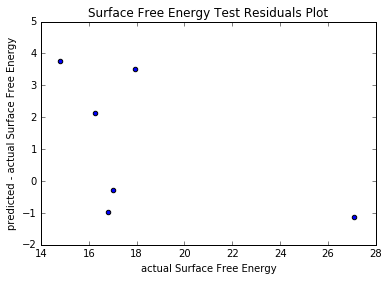

In [19]:
fig, ax = plt.subplots()
ax.scatter(yTest,yPredicted-yTest)
ax.set_ylabel('predicted - actual Surface Free Energy')
ax.set_xlabel('actual Surface Free Energy')
ax.set_title('Surface Free Energy Test Residuals Plot')
plt.show()

In [20]:
# predictions = results.predict(data[half:])
print('OLS test',mean_squared_error(y_true = yTest, y_pred = result.predict(Xtest)))
print('OLS train',mean_squared_error(y_true = yTrain, y_pred = result.predict(Xtrain)))


OLS test 3.4653982674408206
OLS train 1.5547905910335154


In [21]:
print('LinearRegression test',mean_squared_error(y_true = yTest, y_pred = model.predict(Xtest)))
print('LinearRegression train',mean_squared_error(y_true = yTrain, y_pred = model.predict(Xtrain)))

LinearRegression test 5.531011513852419
LinearRegression train 1.2487811651027785


In [22]:
print('test',model.score(Xtest, yTest),'\ntrain',model.score(Xtrain,yTrain))


test 0.6601594567322953 
train 0.922183455527406


### Notes:

#### 7,12-dimethylbenz[a]anthracene (DMBA) example constituent of asphaltenes

DMBA is a potent carcinogen by itself and acts at several sites, including skin, mammary gland, and oral cavity. Further, it is a powerful initiating agent that can also cause progression from benign (papillomas) to highly malignant tumors (carcinomas). Several rodent species have been used to study DMBA carcinogenesis as well as a few different doses are commonly used in such studies. Further, so-called 2-stage carcinogenic model consists of the initiation with i.e., 5 DMBA daily doses, followed by the promotion with TPA (aka PMA) originally isolated from croton oil, which is still occasionally used as a tumor promotor. In addition to measuring papillomas and carcinomas, our lab also showed that oxidative stress contributes to the DMBA-induced carcinogenic process, especially due to chronic inflammation and oxidant formation. In addition, we showed that DMBA treatment causes formation of inflammatory cytokines in SENCAR mouse skin, whose activity is similar to that of TPA-mediated inflammation. We found that cytokine IL-1 alpha participates in modulation of multiplicity and volume of carcinomas, while TNF-alpha modulates papillomas. These aspects are presented in the three publications listed below.

K. Frenkel, L. Wei, and H. Wei. 7,12-Dimethylbenz[a]anthracene induces oxidative DNA modification in vivo. Free Radical Biol. Med., 19:373-380, 1995.
M.-T. Huang, W. Ma, P. Yen, J.-G. Xie, J. Han, K. Frenkel, D. Grunberger, and A.H. Conney. Inhibitory effects of caffeic acid phenethyl ester (CAPE) on 12-O-tetradecanoyl-phorbol-13-acetate-induced tumor promotion in mouse skin and the synthesis of DNA, RNA and protein in HeLa cells. Carcinogenesis 17:761-765, 1996.
Li X, Eckard J, Shah R, Malluck C, and Frenkel K. Interleukin-1 alpha up-regulation in vivo by a potent carcinogen 7,12-dimethylbenz[a]anthracene (DMBA) and control of DMBA-induced inflammatory responses. Cancer Res. 62:417-423, 2002.